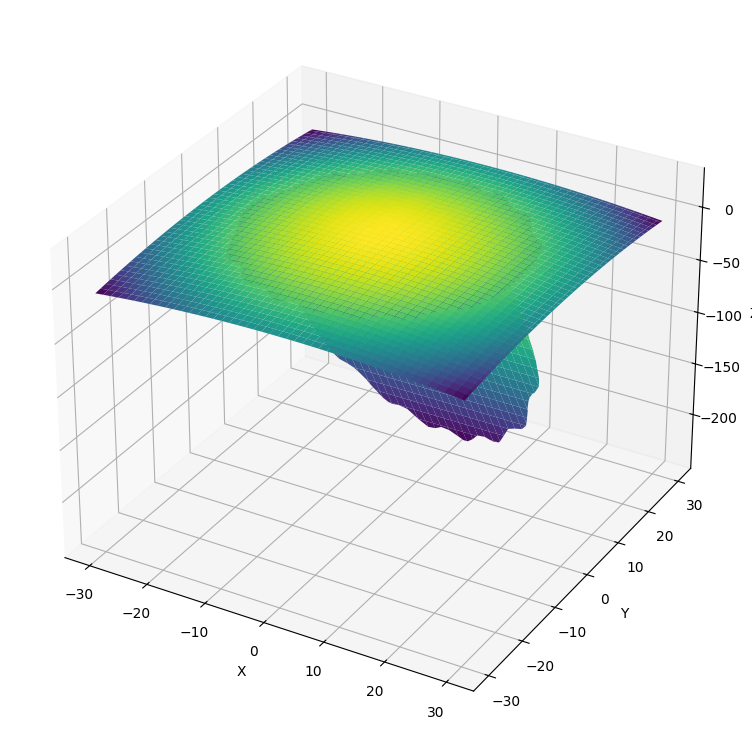

In [323]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tifffile as tiff

# Create a grid of x and y values
resolution = 500
size = 30
x = np.linspace(-size,  size,  resolution+1)
y = np.linspace(-size,  size,  resolution+1)
x, y = np.meshgrid(x, y)


z1 = (-0.05*x**2-0.05*y**2+30)+np.sin(x) # top
z2 = (-0.01*x**2-0.01*y**2+10) # bottom
# z3 = 0.01*x**2+1*y-10 # side 1
z3 = -10*y-20


# 
z1 = np.where(z1>z2, z1, np.nan)
z3 = np.where(z3<z1, z3, np.nan)
# z3 = np.where(z3>z2, z3, np.nan)
# z3 = np.where((z3 < z1) & (z3 > z2), z3, np.nan)
# z3 = np.where(z3 > resolution/size, np.nan, z3)

# z1 = np.where(z1 > 0, z1, np.nan)
# z2 = np.where(z2 > 0, z2, np.nan)
# z3 = np.where(z3 > 0, z3, np.nan)

# z1 = np.where(z1 > z2, z1, np.nan)
# z2 = np.where(z1 > z2, z2, np.nan)

# z1 = np.where(z1 < z3, z3, z1)


# Create a list of z arrays
z_arrays = [z1, z2, z3]  # Add more z arrays to the list as needed


# Create a figure with subplots
fig = plt.figure(figsize=(15,  15))

# Create a  3D subplot for each z array
ax = fig.add_subplot(2,  2, 1, projection='3d')

for i, z in enumerate(z_arrays):
    ax.plot_surface(x, y, z, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# # Create a  2D subplot for each z array
# for i, z in enumerate(z_arrays):
#     ax = fig.add_subplot(2,  2, i+3)
#     ax.contourf(x, y, z, cmap='viridis')
#     ax.set_xlabel('X')
#     ax.set_ylabel('Y')
#     ax.set_title(f'Top View {i+1}')

plt.tight_layout()
plt.show()

In [299]:
d3_array = np.zeros(shape=(resolution, resolution, resolution))

def update_d3_array(z, d3_array):
    for i in range(z.shape[0]):
        for j in range(z.shape[1]):
            if not np.isnan(z[i][j]):
                d3_array[i][j][int(z[i][j]*5)] =  1

# Update d3_array with each z array
update_d3_array(z1, d3_array)
update_d3_array(z2, d3_array)


def normalize_image(im, mult_factor = 1):
    '''
    Normalize image 0-1 and multiply by any factor
    '''
    norm_im = (im - im.min()) / (im.max()-im.min()) * mult_factor
    return norm_im


cell_write = './../ppujol/benchmarking/cell1.tif'

tiff.imwrite(cell_write, normalize_image(d3_array, 65535).astype(np.uint16), imagej=True)

In [161]:
d3_array.shape


(500, 500, 500)